# Diamonds

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV

%matplotlib inline

In [35]:
df = pd.read_csv('life_expectancy.csv', index_col = 'Unnamed: 0')

In [36]:
df.head()

,country,life_expectancy,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,total_expenditure,gdp,thinness_till19,inf_death,school,population,status,pop_size,death_ratio
0,Afghanistan,65.0,0.01,65.0,1154,19.1,6.0,65.0,0.1,8.16,584.259210,17.2,62,10.1,33736494.0,Developing,3,4.241935
1,Afghanistan,59.9,0.01,62.0,492,18.6,58.0,62.0,0.1,8.18,612.696514,17.5,64,10.0,327582.0,Developing,1,4.234375
2,Afghanistan,59.9,0.01,64.0,430,18.1,62.0,64.0,0.1,8.13,631.744976,17.7,66,9.9,31731688.0,Developing,3,4.060606
3,Afghanistan,59.5,0.01,67.0,2787,17.6,67.0,67.0,0.1,8.52,669.959000,17.9,69,9.8,3696958.0,Developing,2,3.942029
4,Afghanistan,59.2,0.01,68.0,3013,17.2,68.0,68.0,0.1,7.87,63.537231,18.2,71,9.5,2978599.0,Developing,2,3.873239


In [37]:
df = df.dropna()
con_features = ['bmi','hiv','school', 'death_ratio', 'gdp']
X = df.loc[:, con_features]
x = df.loc[:, ['alcohol', 'hepatitisB', 'measles', 'bmi',
       'polio', 'diphtheria', 'hiv', 'total_expenditure', 'gdp',
       'thinness_till19', 'inf_death', 'school', 'population', 'pop_size', 'death_ratio']]
y = df.loc[:, 'life_expectancy']

In [38]:
df.to_csv('cleaned_life_expectancy.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state= 42)

In [6]:
#set up the model comparison dataframe
evaluation = pd.DataFrame({'Model': [],
                           'Power': [],
                           'Features':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})




For the simple bad linear reg model we used carat as it had the highest pearson coeff

In [7]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [8]:
lr = linear_model.LinearRegression()

lr.fit(X_train['gdp'].values.reshape(-1,1), y_train)


pred = lr.predict(X_test['gdp'].values.reshape(-1,1))

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
rtrsm = float(format(lr.score(X_train['gdp'].values.reshape(-1,1), y_train),'.3f'))
rtesm = float(format(lr.score(X_test['gdp'].values.reshape(-1,1), y_test),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=1)
cv = float(format(cross_val_score(lr,X_train[['gdp']],y_train,cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression', 1,'gdp', rmsesm, rtrsm,'-', rtesm,'-', cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 67.29
Coefficient: [0.00032739]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181


In [9]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(x_train, y_train)

coefficients = complex_model_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = complex_model_1.predict(x_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(complex_model_1.score(x_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(x_train, y_train),x_train.shape[0],len(con_features)),'.3f'))
rtesm = float(format(complex_model_1.score(x_test, y_test),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(x_test, y_test),x_test.shape[0],len(con_features)),'.3f'))

crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(complex_model_1, x_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(complex_model_1.intercept_))
print('Coefficient: {}'.format(complex_model_1.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Linear Regression', 1, 'all features', rmsesm, artrcm, rtrsm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 47.63
Coefficient: [-1.27964580e-01 -1.21986957e-02  1.31778174e-05  4.87308124e-02
  1.53148251e-02  3.32813222e-02 -6.22838468e-01  8.90579366e-02
  9.09233342e-05 -1.11894630e-01 -8.83961757e-05  1.55160312e+00
  2.27430525e-09 -3.93470707e-01 -2.12815095e-03]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181
1,Multivariate Linear Regression,1.0,all features,4.349,0.773,0.195,0.734,0.73,0.765


In [10]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train, y_train)

coefficients = complex_model_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = complex_model_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(complex_model_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(con_features)),'.3f'))
rtesm = float(format(complex_model_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(con_features)),'.3f'))

crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(complex_model_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(complex_model_1.intercept_))
print('Coefficient: {}'.format(complex_model_1.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Linear Regression', 1, 'bmi, hiv, school, death_ratio, gdp', rmsesm, artrcm, rtrsm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 48.30
Coefficient: [ 5.67830327e-02 -6.40167718e-01  1.61837362e+00 -1.00174357e-03
  8.68126342e-05]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181
1,Multivariate Linear Regression,1.0,all features,4.349,0.773,0.195,0.734,0.73,0.765
2,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp",4.413,0.761,0.195,0.726,0.722,0.756


In [11]:
def mean_norm(col):
    mean = col.mean()
    mx = np.max(col)
    mn = np.min(col)
    norm = (col - mean)/(mx - mn)
    return norm

In [12]:
for col in con_features:
    X_train[col] = mean_norm(X_train[col])

/Users/flatiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
for col in con_features:
    X_test[col] = mean_norm(X_test[col]);

/Users/flatiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#y_train, y_test = np.log(y_train), np.log(y_test)

In [15]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train, y_train)

coefficients = complex_model_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = complex_model_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(con_features)),'.3f'))
rtrcm = float(format(complex_model_1.score(X_train, y_train),'.3f'))

rtesm = float(format(complex_model_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(con_features)),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(complex_model_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(complex_model_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Linear Regression', 1, 'bmi, hiv, school, death_ratio, gdp (standardised)', rmsesm, rtrcm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 69.15
Coefficient: {'bmi': 4.264405757475435, 'hiv': -32.328469744155264, 'school': 26.37949002791739, 'death_ratio': -0.35010783615721863, 'gdp': 10.345553682537737}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181
1,Multivariate Linear Regression,1.0,all features,4.349,0.773,0.195,0.734,0.73,0.765
2,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp",4.413,0.761,0.195,0.726,0.722,0.756
3,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.564,0.762,0.761,0.707,0.703,0.756


In [16]:
poly = PolynomialFeatures(2)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.transform(X_test)

In [17]:
poly_model_2 = linear_model.LinearRegression()
poly_model_2.fit(X_train_2, y_train)

coefficients = poly_model_2.coef_
coeff = dict(zip(con_features, coefficients))

pred = poly_model_2.predict(X_test_2)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(poly_model_2.score(X_train_2, y_train),'.3f'))
artrcm = float(format(adjustedR2(poly_model_2.score(X_train_2, y_train),X_train_2.shape[0],X_train_2.shape[1]),'.3f'))
rtesm = float(format(poly_model_2.score(X_test_2, y_test),'.3f'))
artecm = float(format(adjustedR2(poly_model_2.score(X_test_2, y_test),X_test_2.shape[0],X_test_2.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(poly_model_2, X_train_2, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(poly_model_2.intercept_))
# print('Coefficient: {}'.format(coeff))
coeff = []
for coef in coefficients:
    if coef != 0:
        coeff.append(coef)
print(coeff)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Polynomial Regression', 2,'bmi, hiv, school, death_ratio, gdp (standardised)', rmsesm, rtrcm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 69.58
[3.789557133045941, -63.484433748917375, 20.54292475770439, 3.3212405528642694, 26.44098763305064, 4.509595639205494, -5.40825380560327, -17.839876375956113, -4.722446570846285, 3.449453202852928, 55.24620388772843, 31.95884340424486, 3.463195096334551, -14.726747446291462, 13.582395950065104, -19.30159383246552, -51.7372673864036, -19.633897977402672, -10.433229732889908, -14.13534800312153]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181
1,Multivariate Linear Regression,1.0,all features,4.349,0.773,0.195,0.734,0.73,0.765
2,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp",4.413,0.761,0.195,0.726,0.722,0.756
3,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.564,0.762,0.761,0.707,0.703,0.756
4,Multivariate Polynomial Regression,2.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.330,0.826,0.824,0.736,0.719,0.818


In [18]:
poly = PolynomialFeatures(3)
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.transform(X_test)

In [19]:
poly_model_3 = linear_model.LinearRegression()
poly_model_3.fit(X_train_3, y_train)

coefficients = poly_model_3.coef_
coeff = dict(zip(con_features, coefficients))

pred = poly_model_3.predict(X_test_3)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(poly_model_3.score(X_train_3, y_train),'.3f'))
artrcm = float(format(adjustedR2(poly_model_3.score(X_train_3, y_train),X_train_3.shape[0], X_train_3.shape[1]),'.3f'))
rtesm = float(format(poly_model_3.score(X_test_3, y_test),'.3f'))
artecm = float(format(adjustedR2(poly_model_3.score(X_test_3, y_test),X_test_3.shape[0],X_test_3.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(poly_model_3, X_train_3, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(poly_model_3.intercept_))
# print('Coefficient: {}'.format(coeff))
coeff = []
for coef in coefficients:
    if coef != 0:
        coeff.append(coef)
print(coeff)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Polynomial Regression', 3,'bmi, hiv, school, death_ratio, gdp (standardised)', rmsesm, rtrcm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 68.00
[1.552370247388259e-10, 5.46941107990652, -102.08420730789328, 35.18403813764591, 7.388093174209487, 0.9328091597561219, -5.037734562687902, -98.88156504464482, 16.473691498893196, -2.370189980551814, -80.60386371936042, 193.29943743869643, 467.56591688591226, 22.267367163571826, -787.8087456144477, -3.447114376688873, 8.949946972041356, 209.2948151636543, -10.174636581148079, 26.764917045018617, -225.7158076216582, -48.8206983271694, -111.18659789054225, 106.91895423893783, -21.003718291893563, -47.038600215642475, -47.9970657091912, 542.5455356606886, 57.75297319117249, -2156.862324385185, -4.172660762021504, 48.62930946715898, 17.65162642949932, -5.8375931613077015, -65.17806040511594, -5.876923740530771, -109.1847289193856, -285.79745329671056, -26.158318387111205, 1559.997418556671, 3.282116148144759, 43.95734512292607, 6715.41795900944, 38.70442912588705, -64.05719902130414, -4488.611012690633, -40.79021722161966, 6.527234275376

,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181
1,Multivariate Linear Regression,1.0,all features,4.349,0.773,0.195,0.734,0.73,0.765
2,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp",4.413,0.761,0.195,0.726,0.722,0.756
3,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.564,0.762,0.761,0.707,0.703,0.756
4,Multivariate Polynomial Regression,2.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.330,0.826,0.824,0.736,0.719,0.818
5,Multivariate Polynomial Regression,3.0,"bmi, hiv, school, death_ratio, gdp (standardised)",5.012,0.852,0.845,0.646,0.575,0.794


In [20]:
lasso_1 = LassoCV(max_iter = 100000, cv = 5)
lasso_1.fit(X_train, y_train)

coefficients = lasso_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = lasso_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(lasso_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(lasso_1.score(X_train, y_train), X_train.shape[0], X_train.shape[1]),'.3f'))
rtesm = float(format(lasso_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(lasso_1.score(X_test, y_test),X_test.shape[0],X_test.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(lasso_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lasso_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Lasso Regression', 1,'bmi, hiv, school, death_ratio, gdp (standardised) alpha = {}'.format(lasso_1.alpha_), rmsesm, rtrcm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 69.15
Coefficient: {'bmi': 4.2610158922738135, 'hiv': -32.18181051705188, 'school': 26.36696018568352, 'death_ratio': -0.2811781867460681, 'gdp': 10.106982678946551}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181
1,Multivariate Linear Regression,1.0,all features,4.349,0.773,0.195,0.734,0.73,0.765
2,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp",4.413,0.761,0.195,0.726,0.722,0.756
3,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.564,0.762,0.761,0.707,0.703,0.756
4,Multivariate Polynomial Regression,2.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.330,0.826,0.824,0.736,0.719,0.818
5,Multivariate Polynomial Regression,3.0,"bmi, hiv, school, death_ratio, gdp (standardised)",5.012,0.852,0.845,0.646,0.575,0.794
6,Multivariate Lasso Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardis...",4.558,0.762,0.761,0.708,0.704,0.757


In [21]:
lasso_2 = LassoCV(max_iter = 100000, cv = 5)
lasso_2.fit(X_train_2, y_train)

coefficients = lasso_2.coef_
coeff = dict(zip(con_features, coefficients))

pred = lasso_2.predict(X_test_2)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(lasso_2.score(X_train_2, y_train),'.3f'))
artrcm = float(format(adjustedR2(lasso_2.score(X_train_2, y_train), X_train_2.shape[0], X_train_2.shape[1]),'.3f'))
rtesm = float(format(lasso_2.score(X_test_2, y_test),'.3f'))
artecm = float(format(adjustedR2(lasso_2.score(X_test_2, y_test),X_test_2.shape[0],X_test_2.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(lasso_2, X_train_2, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lasso_2.intercept_))
# print('Coefficient: {}'.format(coeff))
coeff = []
for coef in coefficients:
    if coef != 0:
        coeff.append(coef)
print(coeff)

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Lasso Regression', 2,'bmi, hiv, school, death_ratio, gdp (standardised) alpha = {}'.format(lasso_2.alpha_), rmsesm, rtrcm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 69.46
[4.000045071025283, -62.269657065316586, 20.82843448921663, 2.981508128005986, 21.92903504835099, 4.29638445974796, -15.766011585342902, -5.279698813593081, 0.4066335176071086, 51.044891609029804, 8.127929577084553, 3.5636877574560963, 7.7622743673138155, -18.5029765883462, -32.20307036453575, -17.300796217784935, -10.467486639580407]


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181
1,Multivariate Linear Regression,1.0,all features,4.349,0.773,0.195,0.734,0.73,0.765
2,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp",4.413,0.761,0.195,0.726,0.722,0.756
3,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.564,0.762,0.761,0.707,0.703,0.756
4,Multivariate Polynomial Regression,2.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.330,0.826,0.824,0.736,0.719,0.818
5,Multivariate Polynomial Regression,3.0,"bmi, hiv, school, death_ratio, gdp (standardised)",5.012,0.852,0.845,0.646,0.575,0.794
6,Multivariate Lasso Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardis...",4.558,0.762,0.761,0.708,0.704,0.757
7,Multivariate Lasso Regression,2.0,"bmi, hiv, school, death_ratio, gdp (standardis...",4.222,0.825,0.822,0.749,0.733,0.818


In [22]:
itr = [x/1000 for x in list(range(0, 1000))]

In [23]:
ridge_1 = RidgeCV(alphas = itr, cv = 5)
ridge_1.fit(X_train, y_train)

coefficients = ridge_1.coef_
coeff = dict(zip(con_features, coefficients))

pred = ridge_1.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)),'.3f'))

rtrcm = float(format(ridge_1.score(X_train, y_train),'.3f'))
artrcm = float(format(adjustedR2(ridge_1.score(X_train, y_train), X_train.shape[0], X_train.shape[1]),'.3f'))
rtesm = float(format(ridge_1.score(X_test, y_test),'.3f'))
artecm = float(format(adjustedR2(ridge_1.score(X_test, y_test),X_test.shape[0],X_test.shape[1]),'.3f'))
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state=42)
cv = float(format(cross_val_score(ridge_1, X_train, y_train, cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(ridge_1.intercept_))
print('Coefficient: {}'.format(coeff))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multivariate Ridge Regression', 1,'bmi, hiv, school, death_ratio, gdp (standardised) alpha = {}'.format(ridge_1.alpha_), rmsesm, rtrcm, artrcm, rtesm, artecm, cv]
evaluation

Average Price for Test Data: 69.92
Intercept: 69.15
Coefficient: {'bmi': 4.376170841513992, 'hiv': -31.875417766829187, 'school': 26.17624943626735, 'death_ratio': -0.35144640767481145, 'gdp': 10.263761608298017}


,Model,Power,Features,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,1.0,gdp,7.605,0.195,-,0.186,-,0.181
1,Multivariate Linear Regression,1.0,all features,4.349,0.773,0.195,0.734,0.73,0.765
2,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp",4.413,0.761,0.195,0.726,0.722,0.756
3,Multivariate Linear Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.564,0.762,0.761,0.707,0.703,0.756
4,Multivariate Polynomial Regression,2.0,"bmi, hiv, school, death_ratio, gdp (standardised)",4.330,0.826,0.824,0.736,0.719,0.818
5,Multivariate Polynomial Regression,3.0,"bmi, hiv, school, death_ratio, gdp (standardised)",5.012,0.852,0.845,0.646,0.575,0.794
6,Multivariate Lasso Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardis...",4.558,0.762,0.761,0.708,0.704,0.757
7,Multivariate Lasso Regression,2.0,"bmi, hiv, school, death_ratio, gdp (standardis...",4.222,0.825,0.822,0.749,0.733,0.818
8,Multivariate Ridge Regression,1.0,"bmi, hiv, school, death_ratio, gdp (standardis...",4.552,0.762,0.761,0.708,0.705,0.757


In [24]:
from statsmodels.formula.api import ols

data = pd.concat([x_train, y_train], axis=1)
lr_model_init = ols(formula='life_expectancy~bmi+hiv+school+death_ratio+gdp', data=data).fit()
lr_model_init.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     838.7
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:20:28   Log-Likelihood:                -3806.0
No. Observations:                1319   AIC:                             7624.
Df Residuals:                    1313   BIC:                             7655.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      48.2974      0.591     81.710      0.000      47.138      49.457
bmi             0.0568      0.007      7.756      0.000       0.042       0.071
hiv            -0.6402      0.020    -32.374      0.000      -0.679      -0.601
school          1.6184      0.057     28.498      0.000       1.507       1.730
death_ratio    -0.0010      0.002     -0.572      0.567      -0.004       0.002
gdp          8.681e-05   1.14e-05      7.631      0.000    6.45e-05       0.000
==============================================================================
Omnibus:                       15.072   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.549
Skew:                          -0.186   Prob(JB):                     0.000155
Kurtosis:                       3.426   Cond. No.                     6.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

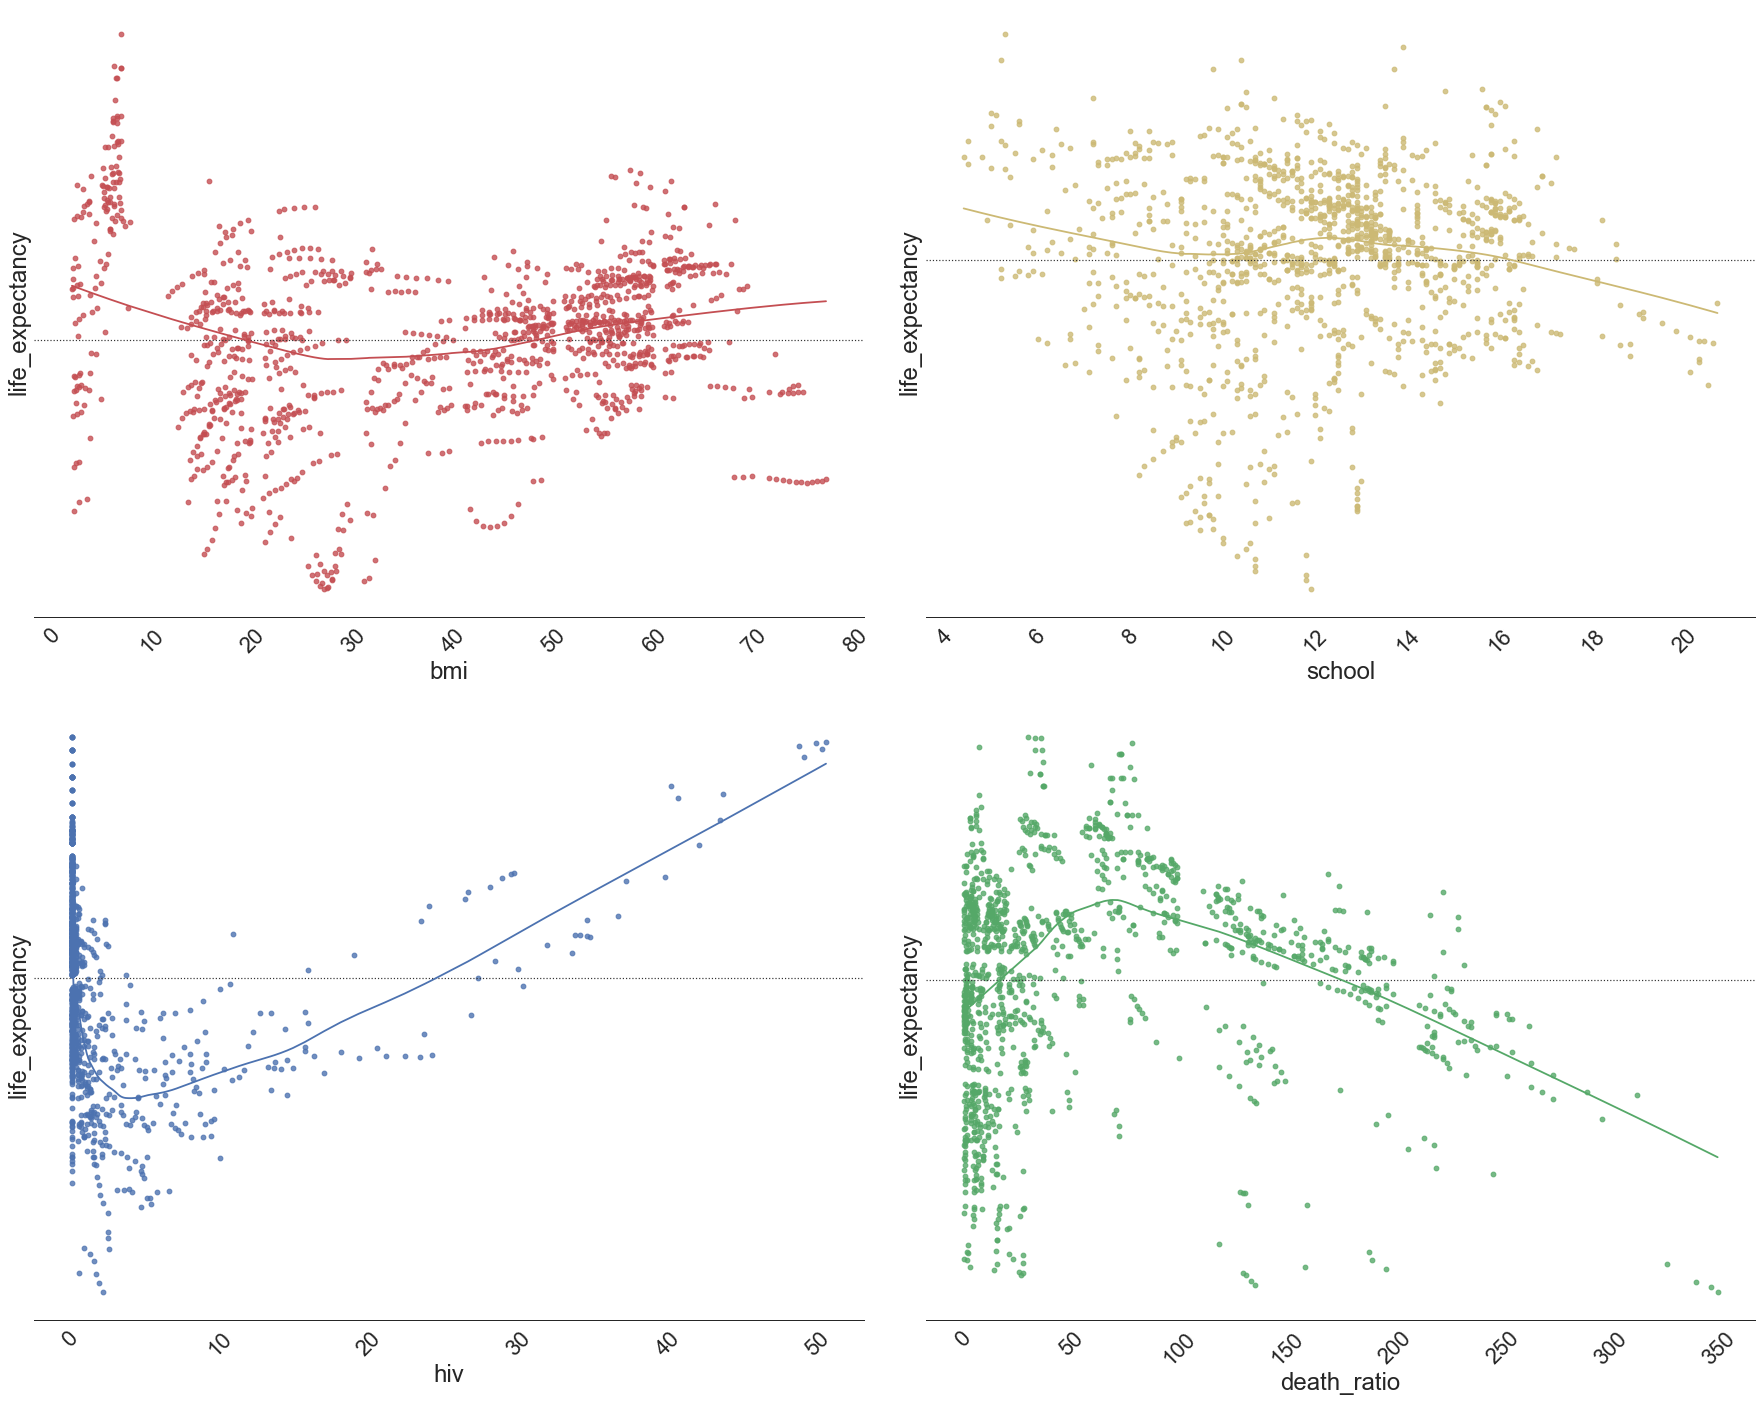

In [60]:
sns.set_context("paper", font_scale=2.5)
f, axes = plt.subplots(2,2, figsize=(25, 20))
sns.despine(left=True)
colors = ['r','b','y','g']
i = 0
for col in range(0,2):
    for row in range(0,2):
        name = con_features[i]
        sns.residplot(x_train[name], y_train, lowess=True, color=colors[i], ax=axes[row, col])
        ax = axes[row,col]
        ax.tick_params(labelrotation=45)
        i += 1     
plt.setp(axes, yticks=[])
plt.tight_layout()
    

In [33]:
df.columns = ['Country', 'Life Expectancy', 'Alcohol Comsumption', 'HepatitisB', 'Measles', 'BMI',
       'Polio', 'Diphtheria', 'HIV\AIDS', 'Total Expenditure on Health', 'GDP',
       'Malnutrition between 5 to 19', 'Infant Mortality', 'School', 'Population', 'Status',
       'Population Size', 'Adult Death Rate']

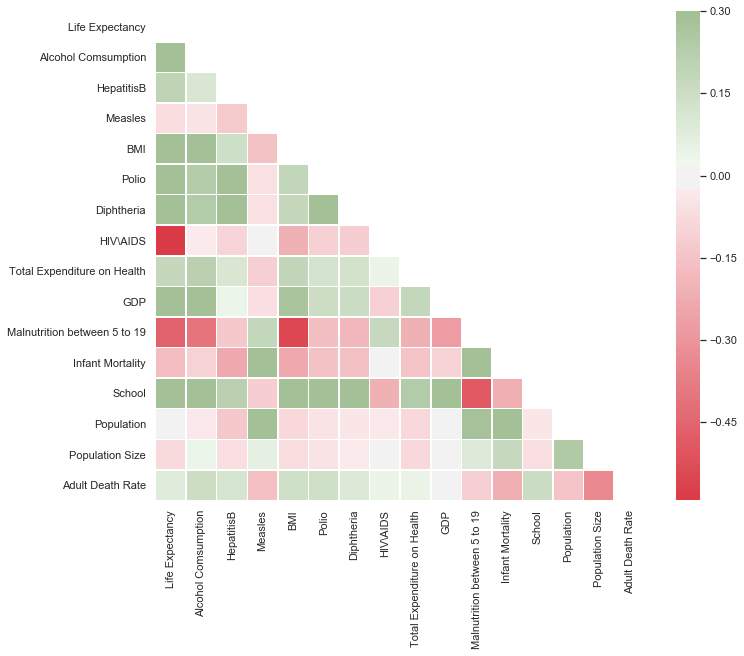

In [34]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 120, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

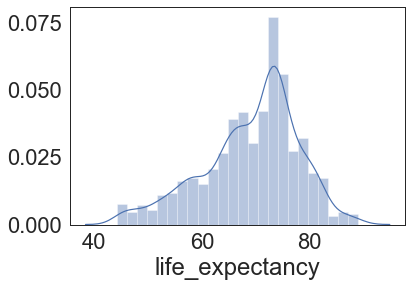

In [65]:
sns.distplot(y_train)

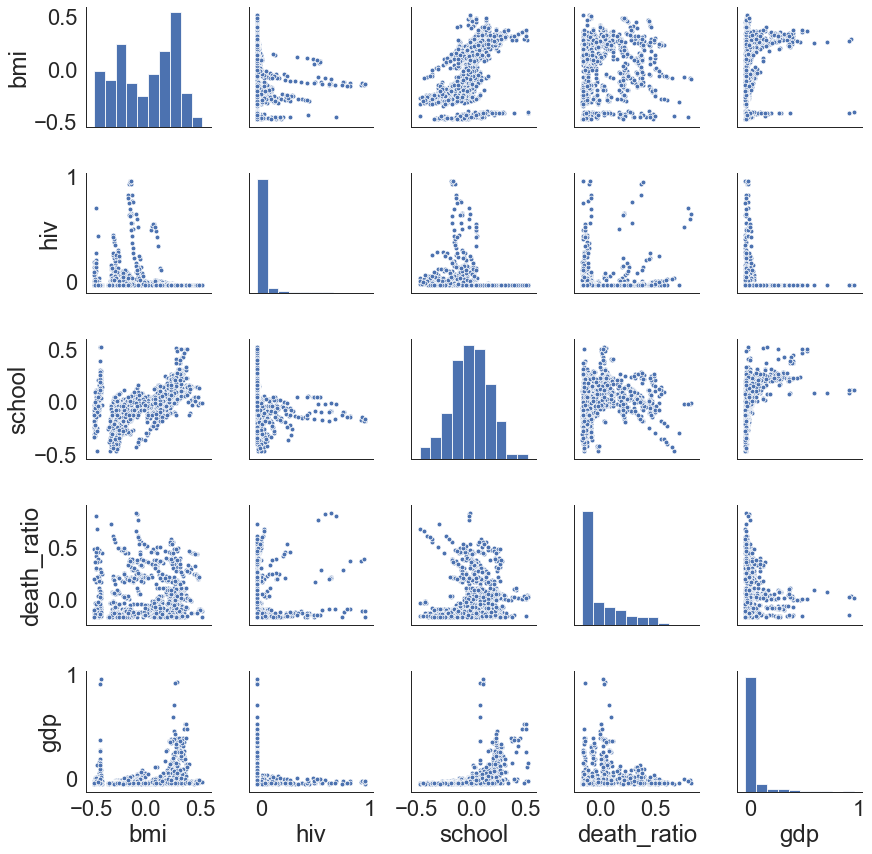

In [68]:
sns.pairplot(X_train)